In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [4]:

# Load the dataset
fish_data = pd.read_csv('/content/fish.csv')
fish_data.columns=['Species','Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']


In [5]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2


In [6]:
# Select only the numeric features
numeric_features = fish_data[['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

# Standardize the features
scaler = StandardScaler()
numeric_features_scaled = scaler.fit_transform(numeric_features)

In [42]:
kmeans = KMeans(n_clusters=4, random_state=0,n_init=10)
fish_data['Cluster'] = kmeans.fit_predict(numeric_features_scaled)

In [43]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,Cluster,Cluster_agglo
0,Bream,290.0,24.0,26.3,31.2,40.0,13.8,3,0
1,Bream,340.0,23.9,26.5,31.1,39.8,15.1,3,0
2,Bream,363.0,26.3,29.0,33.5,38.0,13.3,3,0
3,Bream,430.0,26.5,29.0,34.0,36.6,15.1,3,0
4,Bream,450.0,26.8,29.7,34.7,39.2,14.2,3,0


In [44]:
fish_data['Cluster'].value_counts()

3    34
0    20
1    17
2    13
Name: Cluster, dtype: int64

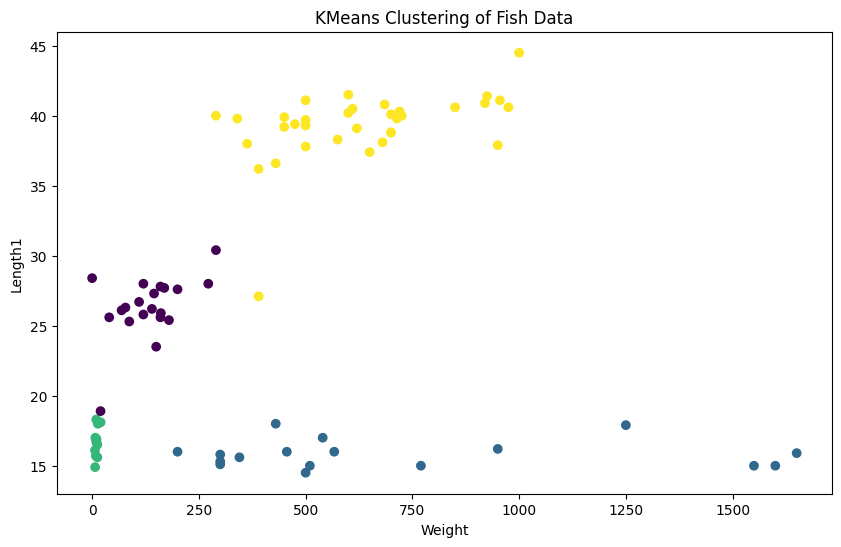

In [45]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(fish_data['Weight'], fish_data['Height'], c=fish_data['Cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('KMeans Clustering of Fish Data')
plt.show()

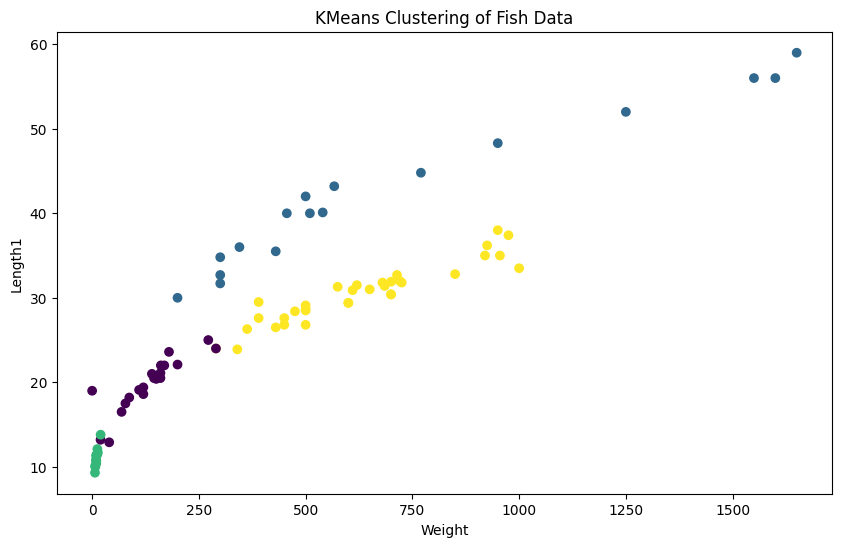

In [46]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(fish_data['Weight'], fish_data['Length1'], c=fish_data['Cluster'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('KMeans Clustering of Fish Data')
plt.show()

In [47]:
from scipy.cluster.hierarchy import linkage,dendrogram
X = np.array(numeric_features_scaled)

In [50]:
from sklearn.cluster import AgglomerativeClustering
agg_hc = AgglomerativeClustering(n_clusters = 4 , metric='euclidean',linkage='ward')
y_pred =agg_hc.fit_predict(X)

In [51]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [52]:
fish_data['Cluster_agglo']=y_pred
fish_data['Cluster_agglo'].value_counts()

2    33
3    19
0    17
1    15
Name: Cluster_agglo, dtype: int64

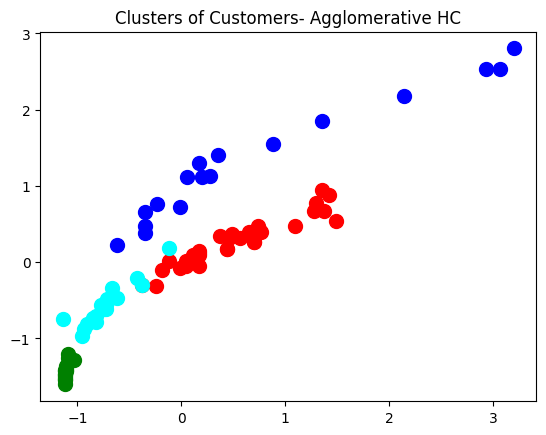

In [53]:
plt.scatter(X[y_pred == 0,0],X[y_pred==0,1],s=100,c='blue',label='cluster1')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],s=100,c='green',label='cluster2')
plt.scatter(X[y_pred==2,0],X[y_pred==2,1],s=100,c='red',label='cluster3')
plt.scatter(X[y_pred==3,0],X[y_pred==3,1],s=100,c='cyan',label='cluster4')
plt.title('Clusters of Customers- Agglomerative HC')
plt.show()

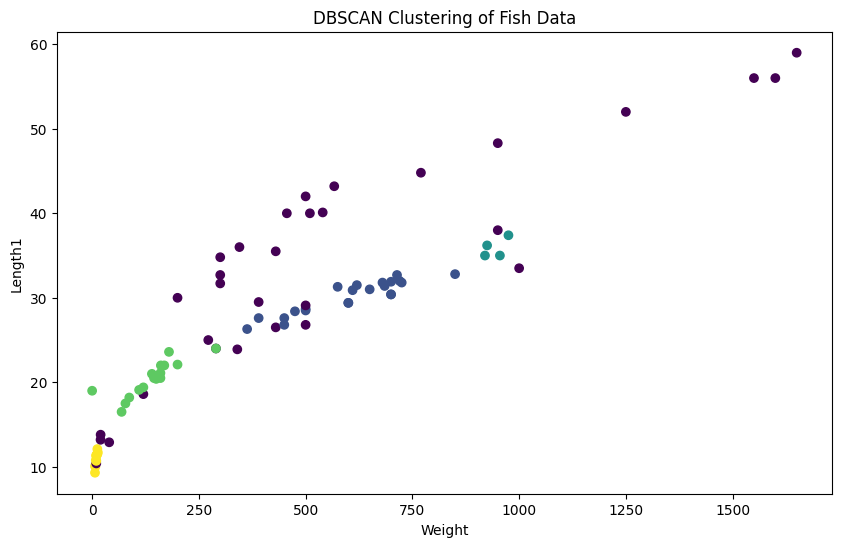

In [58]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
fish_data['Cluster_dbscan'] = dbscan.fit_predict(numeric_features_scaled)

# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(fish_data['Weight'], fish_data['Length1'], c=fish_data['Cluster_dbscan'], cmap='viridis')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.title('DBSCAN Clustering of Fish Data')
plt.show()